In [ ]:
#Create a multiple linear regression model for house price dataset divide 
#dataset into train and test data while giving it to model and predict prices of house

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Create a small dataset (like house details)
data = {
    'Square_Feet': [1500, 2500, 1800, 2200, 1700, 2400, 2100, 2600, 1900, 2300],
    'Bedrooms':    [3,    4,    3,    4,    2,    4,    3,    5,    3,    4],
    'Age':         [10,   15,   5,    20,   10,   15,   10,   5,    15,   20],
    'Price':       [300000, 500000, 400000, 450000, 320000, 
                    480000, 430000, 550000, 410000, 470000]
}

df = pd.DataFrame(data)

# Step 3: Features (inputs) and Target (output we want to predict)
X = df[['Square_Feet', 'Bedrooms', 'Age']]   # What we know about the house
y = df['Price']                              # What we want to predict

# Step 4: Split data into training (learn) and testing (check accuracy)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Create the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)   # Train (learn patterns)

# Step 6: Test the model
y_pred = model.predict(X_test)   # Predict house prices for test data

# Step 7: Evaluate performance
mse = mean_squared_error(y_test, y_pred)   # How far predictions are from actual
r2 = r2_score(y_test, y_pred)              # Accuracy measure (closer to 1 = better)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Step 8: Show Predictions
print("Predicted Prices:", y_pred)
print("Actual Prices:", y_test.values)


C:\Users\saiph\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Mean Squared Error: 504615153.1914497
R2 Score: 0.7508073317573087
Predicted Prices: [379314.64174455 508224.29906542]
Actual Prices: [410000 500000]


In [ ]:
#Assignment 2 :
 #Use dataset crash.csv is an accident survivor’s dataset portal for USA hosted by 
#data.gov. The dataset contains passengers age and speed of vehicle (mph) at 
#the time of impact and fate of passengers (1 for survived and 0 for not 
#survived) after a crash. use logistic regression to decide if the age and speed 
#can predict the survivability of the passengers.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("crash.csv").dropna()

# Features & Target
X = df[['age', 'speed']]
y = df['survive']   # <-- fixed column name

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
 #Assignment 3 :
 #Fit the simple linear regression and polynomial linear regression models to 
#Salary_positions.csv data. Find which one is more accurately fitting to the given 
#data. Also predict the salaries of level 11 and level 12 employees.steps:

R² Linear: 0.878849506101104
R² Polynomial: 1.0


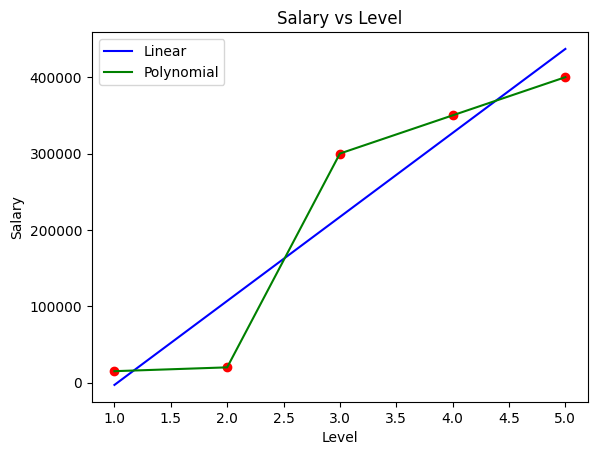

Linear Predictions: [1097000. 1207000.]
Polynomial Predictions: [1.0619e+08 1.7442e+08]


C:\Users\saiph\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [5]:
# Polynomial Regression Example (Simplified)
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('Salary_positions.csv')
X, y = df[['Level']], df['Salary']

# Fit models
lin_reg = LinearRegression().fit(X, y)
poly = PolynomialFeatures(degree=4)
poly_reg = LinearRegression().fit(poly.fit_transform(X), y)

# Predictions & R² scores
y_pred_lin, y_pred_poly = lin_reg.predict(X), poly_reg.predict(poly.transform(X))
print("R² Linear:", r2_score(y, y_pred_lin))
print("R² Polynomial:", r2_score(y, y_pred_poly))

# Visualization
plt.scatter(X, y, color='red')
plt.plot(X, y_pred_lin, color='blue', label='Linear')
plt.plot(X, y_pred_poly, color='green', label='Polynomial')
plt.title('Salary vs Level'); plt.xlabel('Level'); plt.ylabel('Salary'); plt.legend(); plt.show()

# Predict salaries for Levels 11 & 12
levels = np.array([[11], [12]])
print("Linear Predictions:", lin_reg.predict(levels))
print("Polynomial Predictions:", poly_reg.predict(poly.transform(levels)))


In [ ]:
# Assignment 4 : 
#Write a python program to categorize the given news text into one of the 
#available 20 categories of news groups, using multinomial Naïve Bayes machine learning model.

In [6]:
# Naive Bayes Text Classification (Simplified)
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load and preprocess dataset
data = fetch_20newsgroups(subset='all')
X, y = TfidfVectorizer(stop_words='english').fit_transform(data.data), data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nReport:\n", classification_report(y_test, y_pred, target_names=data.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Example prediction
news = ["The stock market is rising due to new regulations."]
print("Predicted Category:", data.target_names[model.predict(TfidfVectorizer(stop_words='english').fit(data.data).transform(news))[0]])


Accuracy: 0.8777

Report:
                           precision    recall  f1-score   support

             alt.atheism       0.85      0.85      0.85       151
           comp.graphics       0.88      0.84      0.86       202
 comp.os.ms-windows.misc       0.86      0.85      0.85       195
comp.sys.ibm.pc.hardware       0.64      0.85      0.73       183
   comp.sys.mac.hardware       0.94      0.87      0.90       205
          comp.windows.x       0.95      0.85      0.90       215
            misc.forsale       0.93      0.72      0.81       193
               rec.autos       0.91      0.94      0.92       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.95      0.95      0.95       211
        rec.sport.hockey       0.90      0.99      0.94       198
               sci.crypt       0.91      0.97      0.93       201
         sci.electronics       0.92      0.82      0.86       202
                 sci.med       0.97      0.93   

In [ ]:
#Assignment 5 : 
#Implement Ridge Regression, Lasso regression, ElasticNet model using 
#boston_houses.csv and take only ‘RM’ and ‘Price’ of the houses. divide the 
#data as training and testing data. Fit line using Ridge regression and to find 
#price of a house if it contains 5 rooms. and compare results.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load the dataset
df = pd.read_csv("boston_houses.csv")

# Feature = number of rooms (RM), Target = Price
X = df[['RM']]      # input (independent variable)
y = df['Price']     # output (dependent variable)

# 2. Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create three regression models
models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

# 4. Train, test, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)          # train the model
    y_pred = model.predict(X_test)       # test on unseen data
    
    # Calculate accuracy (R²), error (MSE), and predict price of a 5-room house
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    price_5 = model.predict([[5]])[0]

    print(f"{name} → R²: {r2:.4f}, MSE: {mse:.4f}, Predicted Price (5 rooms): {price_5:.2f}")


Ridge → R²: nan, MSE: 3973.3404, Predicted Price (5 rooms): 424.99
Lasso → R²: nan, MSE: 4510.9058, Predicted Price (5 rooms): 408.97
ElasticNet → R²: nan, MSE: 3519.5503, Predicted Price (5 rooms): 439.38


C:\Users\saiph\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\sa

In [ ]:
#Assignment 6 :
# Write a python program to Implement Decision Tree classifier model onData 
#which is extracted from images that were taken from genuine and forged 
#banknote-like specimens. (refer UCI dataset https://archive.ics.uci.edu/dataset/267/banknote+authentication)

Accuracy: 0.9818
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

Confusion Matrix:
 [[148   0]
 [  5 122]]


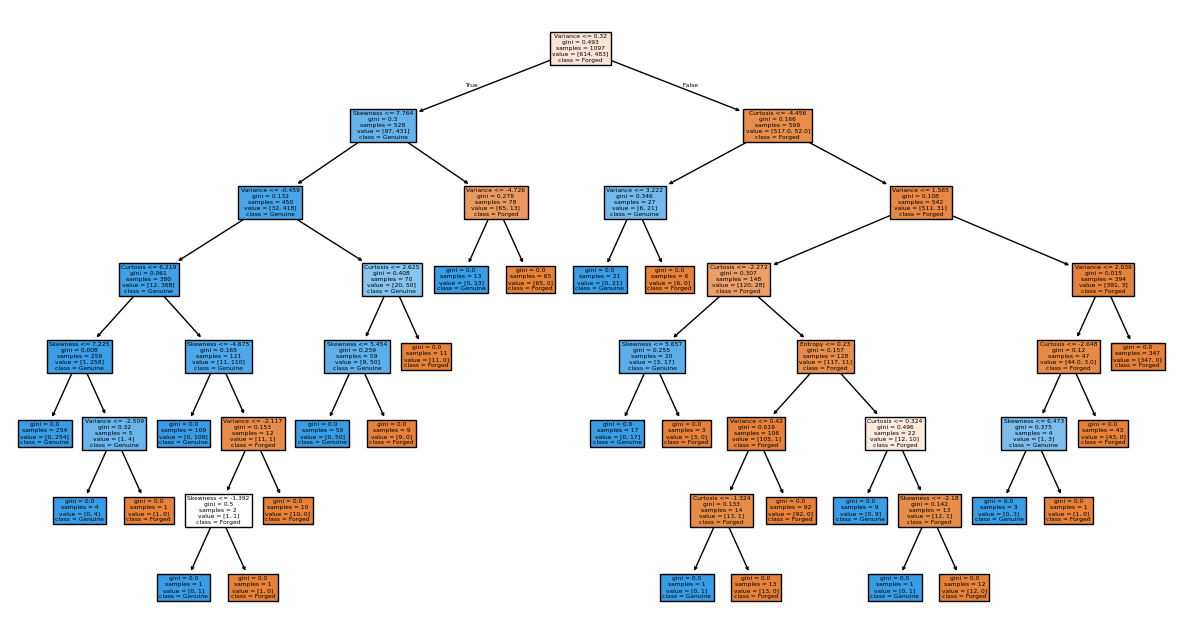

In [8]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
cols = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
df = pd.read_csv(url, header=None, names=cols)

# Features (X) and Target (y)
X, y = df.drop('Class', axis=1), df['Class']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = dt.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=cols[:-1], class_names=['Forged','Genuine'], filled=True)
plt.show()


In [ ]:
# Assignment 7 :
# Classify the iris flowers dataset using SVM and find out the flower type 
#depending on the given input data like sepal length, sepal width, petal length and petal width Find accuracy of all SVM kernels.

In [9]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset (features & labels)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    model = SVC(kernel=k, random_state=42).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    
    print(f"\nKernel: {k} | Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Best kernel
best = max(results, key=results.get)
print(f"\n✅ Best Kernel: {best} (Accuracy = {results[best]:.4f})")



Kernel: linear | Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Kernel: poly | Accuracy: 1.0000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Kernel: rbf | Accuracy: 1.0000
              precision   

C:\Users\saiph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\saiph\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
# Assignment 8 :
# Create KNN model on Indian diabetes patient’s database and predict whether 
#a new patient is diabetic (1) or not (0). Find optimal value of K.


Best K = 29


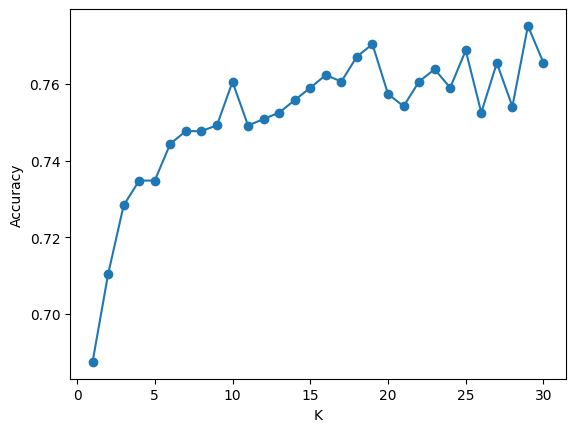

Accuracy: 0.7207792207792207
Confusion Matrix:
 [[81 18]
 [25 30]]


In [11]:
# Import libraries
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
        'BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(url, names=cols)

# Replace 0 with NaN in key columns, then fill with mean
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df.fillna(df.mean(), inplace=True)

# Features & target + scaling
X, y = df.drop('Outcome', axis=1), df['Outcome']
X = StandardScaler().fit_transform(X)

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Find best K using cross-validation
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=10).mean() for k in range(1,31)]
best_k = scores.index(max(scores))+1
print(f"Best K = {best_k}")

# Plot K vs accuracy
plt.plot(range(1,31), scores, marker='o'); plt.xlabel("K"); plt.ylabel("Accuracy"); plt.show()

# Train & evaluate
knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))


In [ ]:
# Assignment 9 : 
#Implement Non-linear regression model (Decision Tree,SVM,KNN)to predict 
#the consumption of petrol use petrolconsumption dataset.( https://www.kaggle.com/code/ajinkyaa/linear-regression-petrolconsumption)

In [15]:
# Import libraries
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("petrol_consumption.csv")

# Features & target
X = data[['Average_income','Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

# Train models
models = {
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVM": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    mae, rmse = mean_absolute_error(y_test,preds), np.sqrt(mean_squared_error(y_test,preds))
    print(f"{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Predict new sample
new_data = np.array([[65000,0.55]])  # Example: income=65k, licence ratio=0.55
new_data_scaled = scaler.transform(new_data)
for name, model in models.items():
    print(f"{name} predicts: {model.predict(new_data_scaled)[0]:.2f}")


DecisionTree → MAE: 98.00, RMSE: 129.57
SVM → MAE: 63.39, RMSE: 79.84
KNN → MAE: 57.10, RMSE: 65.91
DecisionTree predicts: 457.00
SVM predicts: 559.96
KNN predicts: 504.20


C:\Users\saiph\anaconda3\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Assignment 10 : 
#Take iris flower dataset and reduce 4D data to 2D data using PCA. Then train the model and predict new flower with given measurements.

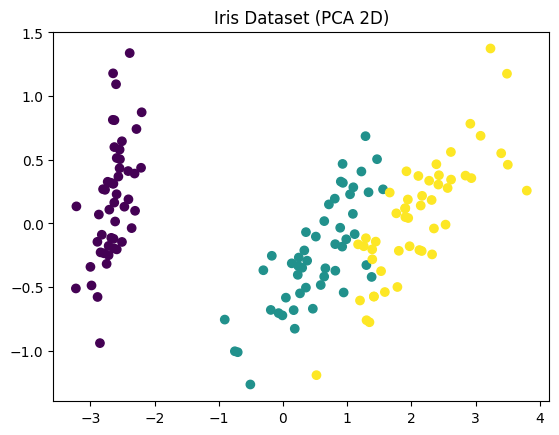

Accuracy: 1.0
Predicted Class: setosa


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Reduce 4D → 2D (for visualization + training)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Show dataset in 2D
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title("Iris Dataset (PCA 2D)")
plt.show()

# Train KNN
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("Accuracy:", knn.score(X_test, y_test))

# Predict a new flower
new_flower = [[5.1, 3.5, 1.4, 0.2]]
new_flower_pca = pca.transform(new_flower)  # same PCA used
print("Predicted Class:", iris.target_names[knn.predict(new_flower_pca)[0]])
